#### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib. Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных. Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки 
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42. Масштабируйте данные с помощью StandardScaler. Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42. Постройте диаграмму рассеяния на этих данных

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
boston = load_boston()
data = boston.data

In [95]:
feature_names = boston.feature_names

In [96]:
X = pd.DataFrame(data, columns=feature_names)

In [97]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [98]:
price = boston.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, price, test_size=0.2, random_state=42)

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler()

In [101]:
X_train_scaled = scaler.fit_transform(X_train)

In [102]:
X_test_scaled = scaler.transform(X_test)

In [103]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

In [104]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [105]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [106]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [107]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [109]:
X_train_tsne.shape

(404, 2)

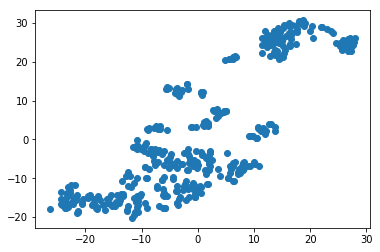

In [110]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

#### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [111]:
from sklearn.cluster import KMeans

In [112]:
model_kmeans = KMeans(n_clusters=3, max_iter = 100, random_state=42)

In [113]:
labels_train = model_kmeans.fit_predict(X_train_scaled)

Text(20, 20, 'Кластер 2')

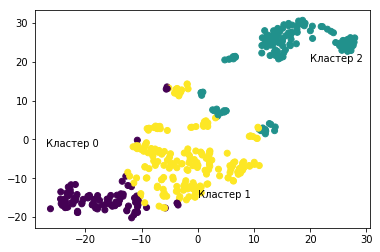

In [114]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1],  c=labels_train)
plt.text(-27, -2, 'Кластер 0')
plt.text(0, -15, 'Кластер 1')
plt.text(20, 20, 'Кластер 2')

In [115]:
y_train[labels_train==0].mean()

27.78837209302326

In [116]:
y_train[labels_train==1].mean()

16.165354330708663

In [117]:
y_train[labels_train==2].mean()

24.958115183246072

Text(0.5, 0, 'Price')

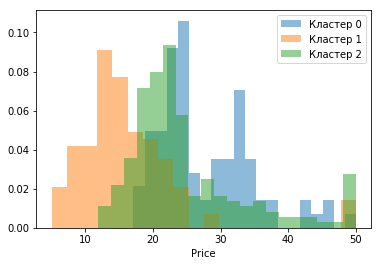

In [118]:
plt.hist(y_train[labels_train==0], bins = 20, density = True, alpha=0.5)
plt.hist(y_train[labels_train==1], bins = 20, density = True, alpha=0.5)
plt.hist(y_train[labels_train==2], bins = 20, density = True, alpha=0.5)
plt.legend(['Кластер 0', 'Кластер 1', "Кластер 2"])
plt.xlabel('Price')

In [119]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.07356558139534886

In [120]:
X_train.loc[labels_train==1, 'CRIM'].mean()

10.797028425196853

In [121]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.42166020942408367

Text(0.5, 0, 'CRIM (per capita crime rate by town)')

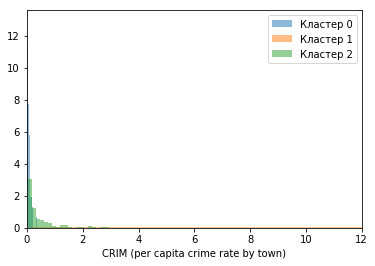

In [122]:
plt.hist(X_train.loc[labels_train==0, 'CRIM'], bins = 20, density = True, alpha=0.5)
plt.hist(X_train.loc[labels_train==1, 'CRIM'], bins = 20, density = True, alpha=0.5)
plt.hist(X_train.loc[labels_train==2, 'CRIM'], bins = 20, density = True, alpha=0.5)
plt.xlim(0, 12)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('CRIM (per capita crime rate by town)')

#### * Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [123]:
labels_test = model_kmeans.predict(X_test_scaled)

In [124]:
y_test[labels_test==0].mean()

31.35

In [125]:
y_test[labels_test==1].mean()

16.43714285714286

In [126]:
y_test[labels_test==2].mean()

21.860784313725492

Text(0.5, 0, 'Price')

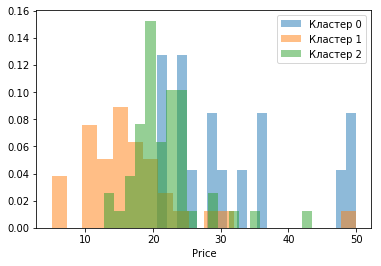

In [127]:
plt.hist(y_test[labels_test==0], bins = 20, density = True, alpha=0.5)
plt.hist(y_test[labels_test==1], bins = 20, density = True, alpha=0.5)
plt.hist(y_test[labels_test==2], bins = 20, density = True, alpha=0.5)
plt.legend(['Кластер 0', 'Кластер 1', "Кластер 2"])
plt.xlabel('Price')

In [128]:
X_test.loc[labels_test==0, 'CRIM'].mean()

0.062060000000000004

In [129]:
X_test.loc[labels_test==1, 'CRIM'].mean()

10.165531142857143

In [130]:
X_test.loc[labels_test==2, 'CRIM'].mean()

0.26607882352941176

Text(0.5, 0, 'CRIM (per capita crime rate by town)')

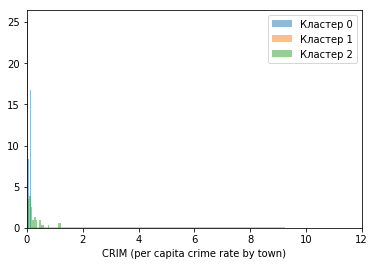

In [131]:
plt.hist(X_test.loc[labels_test==0, 'CRIM'], bins = 20, density = True, alpha=0.5)
plt.hist(X_test.loc[labels_test==1, 'CRIM'], bins = 20, density = True, alpha=0.5)
plt.hist(X_test.loc[labels_test==2, 'CRIM'], bins = 20, density = True, alpha=0.5)
plt.xlim(0, 12)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('CRIM (per capita crime rate by town)')